In [1]:
import numpy as np
from random import randint, random
import matplotlib.pyplot as plt

In [2]:
def next_frame(last_step, last_frame, column):
    lower = max(0, last_step - 1)
    upper = min(last_frame.shape[0] - 1, last_step + 1)
    step = randint(lower, upper)
    frame = last_frame.copy()
    frame[step, column] = 1
    return frame, step

In [3]:
def build_frames(size):
    frames = list()
    frame = np.zeros((size, size))
    step = randint(0, size - 1)
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size - 1
    frame[step, col] = 1
    frames.append(frame)
    for i in range(1, size):
        col = i if right else size - 1 - i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

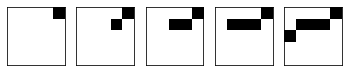

In [4]:
size = 5
frames, right = build_frames(size)
plt.figure()
for i in range(size):
    plt.subplot(1, size, i + 1)
    plt.imshow(frames[i], cmap = 'Greys')
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    X = np.array(X).reshape(n_patterns, size, size, size, 1)
    y = np.array(y).reshape(n_patterns, 1)
    return X, y

In [13]:
size = 20

## Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, TimeDistributed

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2, 2), activation = 'relu'), input_shape = (None, size, size, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, None, 19, 19, 2)   10        
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 9, 9, 2)     0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 162)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                42600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 42,661
Trainable params: 42,661
Non-trainable params: 0
_________________________________________________________________


In [16]:
X, y = generate_examples(size, 5000)
model.fit(X, y, batch_size = 32, epochs = 1)

Epoch 1/1
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1054 - acc: 0.9598


In [17]:
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose = 0)
print('loss: {}, acc: {}'.format(loss, acc * 100))

loss: 0.0591906027123332, acc: 99.00000095367432


In [36]:
good = 0
for _ in range(100):
    X, y = generate_examples(size, 1)
    yhat = model.predict_classes(X)
    expected = 'Right' if y[0] == 1 else 'Left'
    predicted = 'Right' if yhat[0] == 1 else 'Left'
    if expected == predicted:
        good += 1
    print('Expected: {}, Predicted: {}'.format(expected, predicted))
print('Good: {}'.format(good))

Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Left, Predicted: Left
Expected: Right, Predicted: Right
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Left, Predicted: Left
Expected: Right, Predicted: Right
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Left, Predicted: Left
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expected: Left, Predicted: Left
Expected: Right, Predicted: Right
Expected: Right, Predicted: Right
Expect